In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import joblib

In [8]:
base_data = pd.read_csv('DSP_6.csv')


In [9]:
train = pd.read_csv('DSP_6.csv')

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

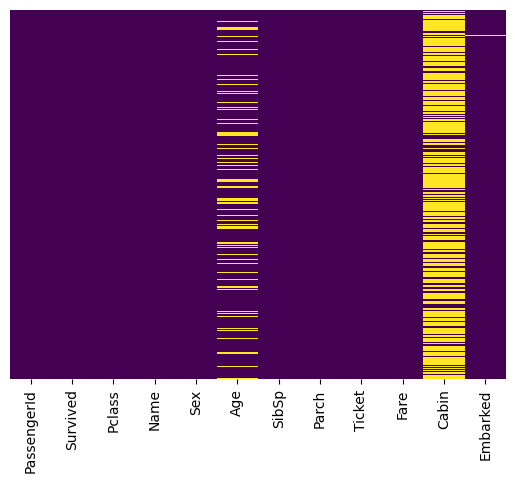

In [12]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis");

In [13]:
train.drop(columns=['Cabin'], inplace=True)

In [14]:
train.fillna(train.mean(numeric_only=True), inplace=True)

In [15]:
train.dropna(inplace=True)

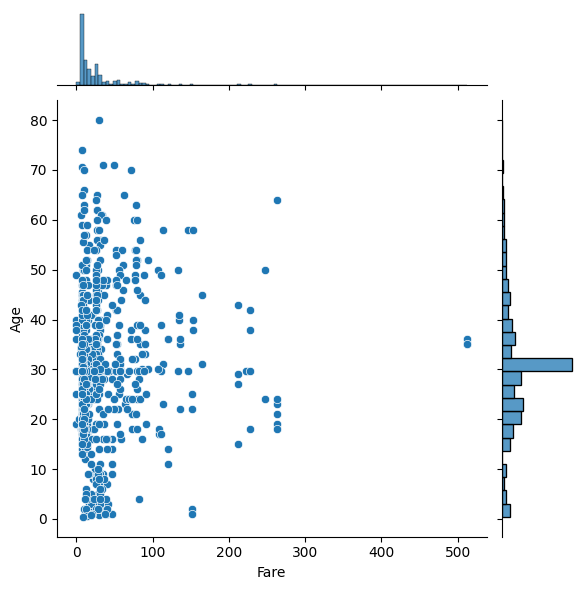

In [16]:
sns.jointplot(x="Fare", y='Age', data=train);

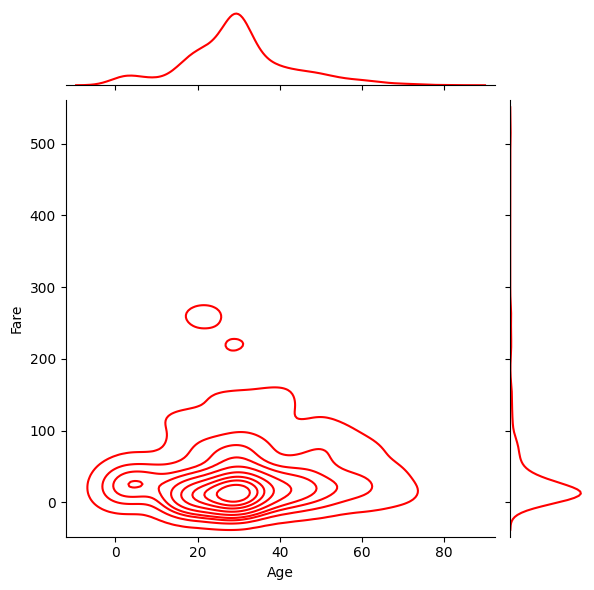

In [17]:
sns.jointplot(x="Age", y='Fare', data=train, color='red', kind='kde');

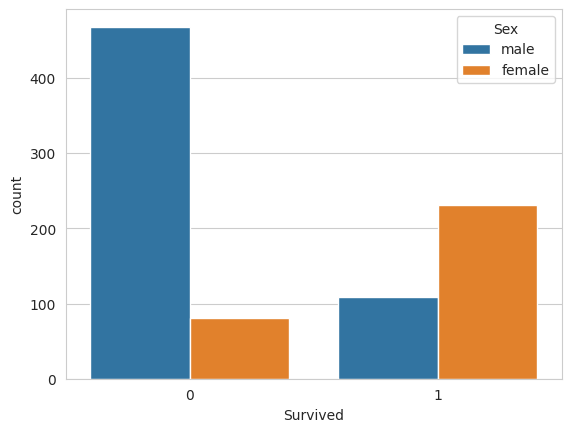

In [18]:
sns.set_style("whitegrid")
sns.countplot(x='Survived', data=train, hue='Sex');

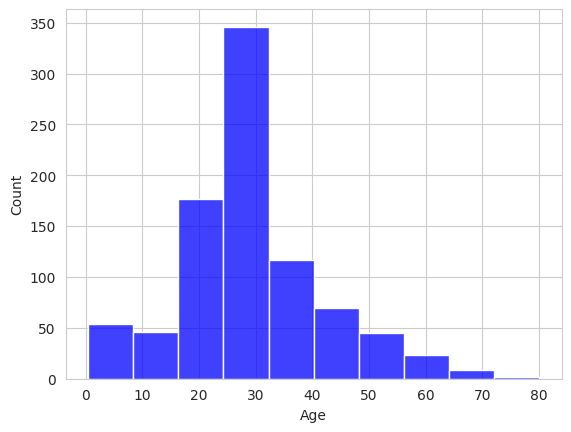

In [22]:
sns.histplot(train['Age'], kde=False, color='blue', bins=10);

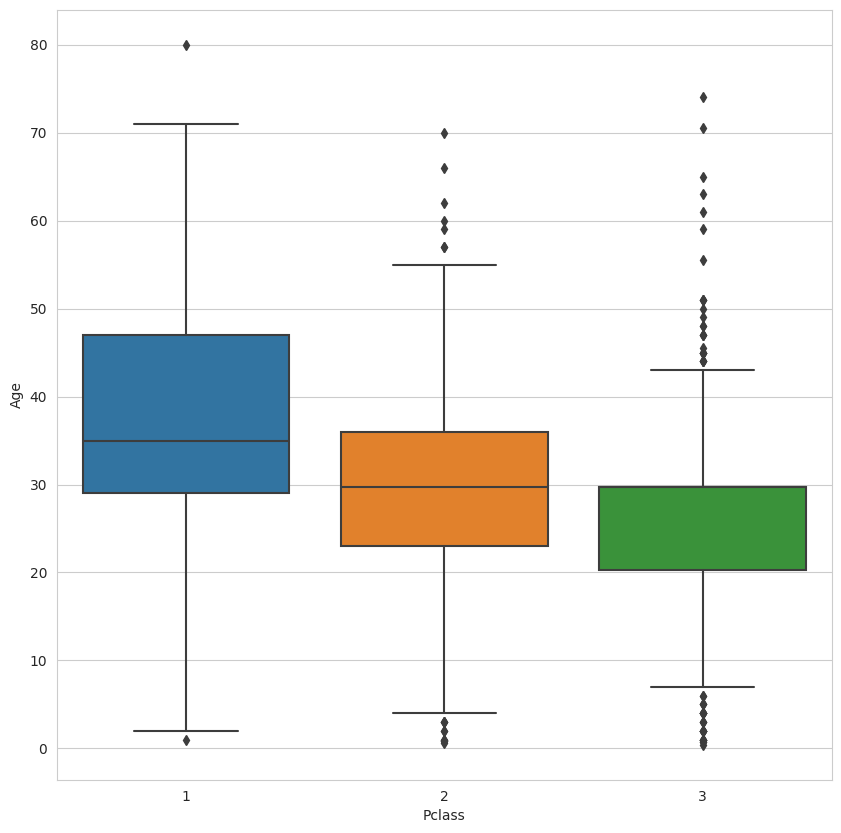

In [20]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Pclass', y='Age', data=train);

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [24]:
lab_enc = LabelEncoder()
train['Embarked'] = lab_enc.fit_transform(train['Embarked'])

In [25]:
train = pd.concat((train, sex), axis=1)

In [26]:
train.drop(['Sex', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [27]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,2,1
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,2,0
3,1,1,35.0,1,0,53.1000,2,0
4,0,3,35.0,0,0,8.0500,2,1


In [28]:
x = train.drop('Survived', axis=1)
y = train['Survived']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=101)

In [30]:
def model(X_train, y_train):
  forest = RandomForestClassifier(n_estimators=10, random_state=42)
  forest.fit(X_train, y_train)
  print(f'Random Forest: {forest.score(X_train, y_train)}')

  lreg = LogisticRegression(max_iter = 500)
  lreg.fit(X_train, y_train)
  print(f'Logistic Regression: {lreg.score(X_train, y_train)}')

  tree = DecisionTreeClassifier()
  tree.fit(X_train, y_train)
  print(f'Decision Tree: {tree.score(X_train, y_train)}')

  return forest, lreg, tree

forest, lreg, tree = model(X_train, y_train)

Random Forest: 0.9725
Logistic Regression: 0.7975
Decision Tree: 0.98375


In [31]:
y1_predict = forest.predict(X_test)
y2_predict = lreg.predict(X_test)
y3_predict = tree.predict(X_test)
print(f'Random forest: {accuracy_score(y_test, y1_predict)}')
print(f'Logistic Regression: {accuracy_score(y_test, y2_predict)}')
print(f'Decision Tree: {accuracy_score(y_test, y3_predict)}')

Random forest: 0.8089887640449438
Logistic Regression: 0.8426966292134831
Decision Tree: 0.7865168539325843


In [35]:
print('Random forest:')
print(classification_report(y_test, y1_predict))

Random forest:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        57
           1       0.73      0.75      0.74        32

    accuracy                           0.81        89
   macro avg       0.79      0.80      0.79        89
weighted avg       0.81      0.81      0.81        89



In [36]:
print('Logistic Regression:')
print(classification_report(y_test, y2_predict))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        57
           1       0.82      0.72      0.77        32

    accuracy                           0.84        89
   macro avg       0.84      0.82      0.82        89
weighted avg       0.84      0.84      0.84        89



In [37]:
print('Decision Tree:')
print(classification_report(y_test, y3_predict))

Decision Tree:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        57
           1       0.68      0.78      0.72        32

    accuracy                           0.79        89
   macro avg       0.77      0.79      0.78        89
weighted avg       0.80      0.79      0.79        89



In [38]:
filename = 'model'
joblib.dump(forest, filename)

['model']